Exponential and Weibull survival function, Hazard function, comparison of these functions, log rank test, Mantel-Haenszel test

##a) Exponential and Weibull survival function

**For the "stanford2" data from the "survival" package, determine survival curves for exponential and Weibull distributions. Compare the obtained survival curves with the Kaplan Meier curve.**

In [39]:
library(survival)
data(stanford2)
attach(stanford2)
head(stanford2)

Warning message in data(stanford2):
“data set ‘stanford2’ not found”


,id,time,status,age,t5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139,139,86,1,12,1.26
159,159,10,1,13,1.49
181,181,60,0,13,NA
119,119,1116,0,14,0.54
74,74,2006,0,15,1.26
120,120,1107,0,18,0.25


In [42]:
# Kaplan Meier curve
km = survfit(Surv(time, status)~ 1)
km


Call: survfit(formula = Surv(time, status) ~ 1)

       n events median 0.95LCL 0.95UCL
[1,] 184    113    631     328    1232

In [ ]:
summary(km)

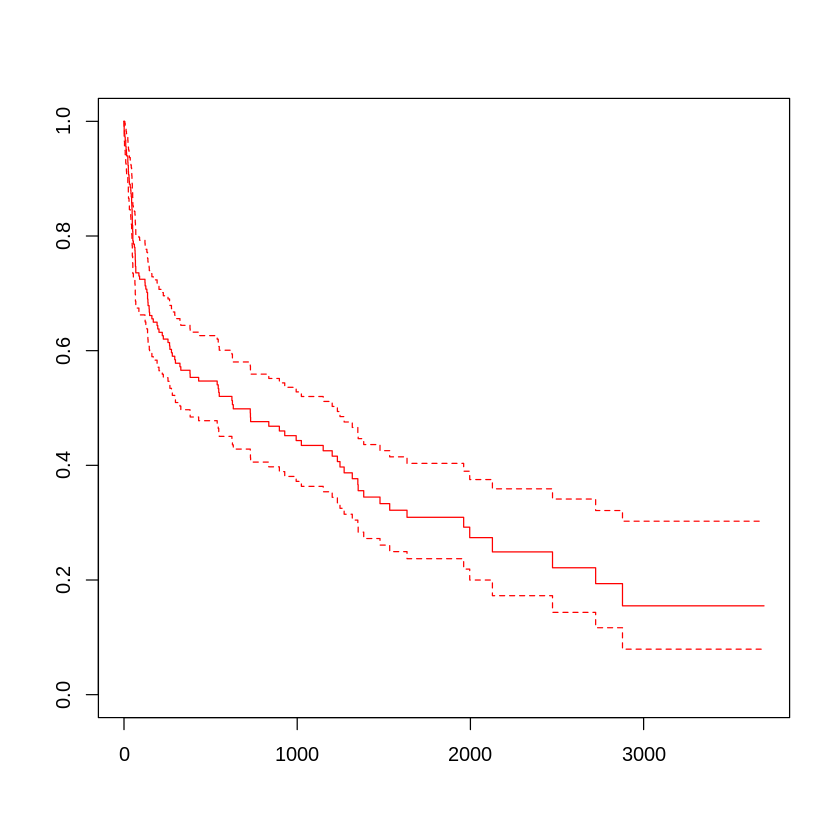

In [41]:
plot(km, col = 'red')

Call: survfit(formula = Surv(time, status) ~ age2)

        n events median 0.95LCL 0.95UCL
age2=0 93     68    381     146     730
age2=1 91     45   1247     731    2723

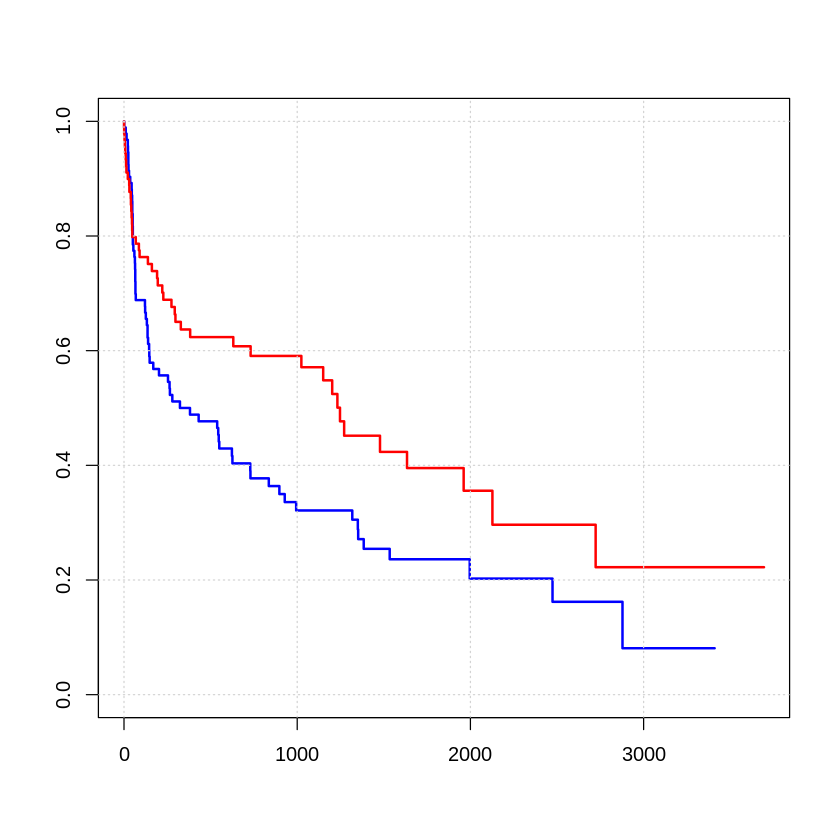

In [46]:
# comparison of age groups survival curves (higher and lower that median), caplan meier function
age2=rep(0, 184)
age2[age<median(age)] = 1
survfit(Surv(time,  status) ~ age2)
plot(survfit(Surv(time,  status) ~ age2), col = c('blue', 'red'), lwd =2)
grid()

In [47]:
# check if there is a significant difference between the two curves (
survdiff(Surv(time, status)~ age2)

Call:
survdiff(formula = Surv(time, status) ~ age2)

        N Observed Expected (O-E)^2/E (O-E)^2/V
age2=0 93       68     55.5      2.82      5.57
age2=1 91       45     57.5      2.72      5.57

 Chisq= 5.6  on 1 degrees of freedom, p= 0.02 

P-value lower than 0.05, there is significant diffrence between this  groups. There is a diffrence in survival time.

**Exponential survival function**

In [51]:
wyk = survreg(Surv(time, status)~ 1, data = stanford2, dist = 'exp')
wyk

Call:
survreg(formula = Surv(time, status) ~ 1, data = stanford2, dist = "exp")

Coefficients:
(Intercept) 
   7.034251 

Scale fixed at 1 

Loglik(model)= -907.9   Loglik(intercept only)= -907.9
n= 184 

 The survival regression model with a constant term (intercept) is fitted to the data. The estimated coefficient for the intercept is 7.034251. The model assumes an exponential distribution for the survival times. The log-likelihood indicates the fit of the model to the data, and in this case, the model does not provide a significantly better fit than the intercept-only model. The sample size is 184, representing the number of individuals included in the analysis.

In [49]:
# lambda exponential
lambda_wyk = exp(-wyk$coef)
lambda_wyk

(Intercept) 
0.0008811775

**Weibull survival function**

In [52]:
wei = survreg(Surv(time, status)~1, data = stanford2, dist = 'weibull')
wei

Call:
survreg(formula = Surv(time, status) ~ 1, data = stanford2, dist = "weibull")

Coefficients:
(Intercept) 
   7.092712 

Scale= 1.804064 

Loglik(model)= -871.8   Loglik(intercept only)= -871.8
n= 184 

The survival regression model with a constant term (intercept) is fitted to the data. The estimated coefficient for the intercept is 7.092712. The model assumes a Weibull distribution for the survival times, with a scale parameter estimated to be 1.804064. The log-likelihood indicates the fit of the model to the data, and in this case, the model does not provide a significantly better fit than the intercept-only model. The sample size is 184, representing the number of individuals included in the analysis.

In [53]:
# lambda weibull
lambda_wei = exp(-wei$icoef[1])
lambda_wei

(Intercept) 
0.0008311405

In [54]:
# kappa
kappa = 1/(exp(wei$icoef[2]))
kappa

Log(scale) 
 0.5543041

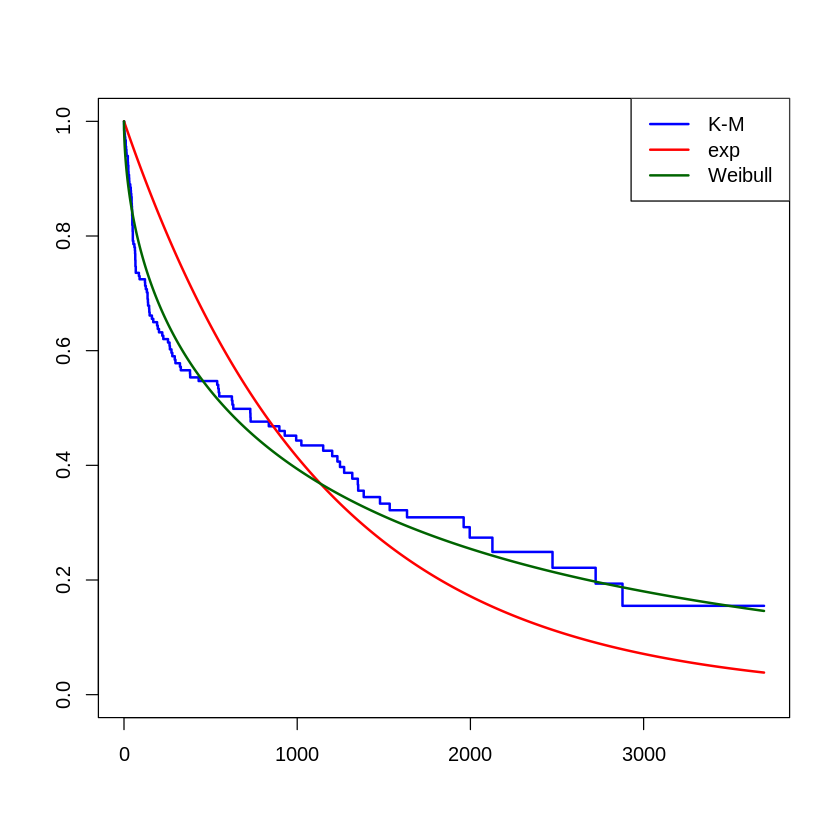

In [55]:
# red exponential
# blue weibull
# black Kaplana Meiera
plot(km, col = "blue", lwd = 2, conf.int = FALSE)
x=seq(0,max(time),length=10000)
y_wei=exp(-(lambda_wyk*x)^kappa)
y_wyk=exp( - lambda_wyk * x)
lines(x, y_wyk, lwd = 2, col = "red")
lines(x, y_wei, lwd = 2, col = "darkgreen")
legend("topright", c("K-M","exp", "Weibull"), col=c("blue","red","darkgreen"), lwd = 2)

## b) Hazard functions

For the above survival functions, determine the hazard functions and determine their 95% intervals
confidence intervals.

In [56]:
# exponential hazard function (lambda)

lambda_wyk = exp(-wyk$coef)
lambda_wyk

(Intercept) 
0.0008811775

In [58]:
# sum of event
sd=sum(stanford2$status)
d
# (n_d = length(which(stanford2$status == 1)))

[1] 113

In [59]:
# standard error for exponential distribution
SE_wyk=sqrt(lambda_wyk/(d-1))
SE_wyk

(Intercept) 
0.002804934

In [60]:
# Confidence intervals for the exponential distribution hazards function
L_wyk = lambda_wyk-1.96*SE_wyk
L_wyk[L_wyk < 0] = 0
L_wyk
(U_wyk = round(lambda_wyk+1.96*SE_wyk, digits = 3))

(Intercept) 
          0

(Intercept) 
      0.006

In [61]:
# weibull hazard function (lambda)

lambda_wei = exp(-wei$icoef[1])
lambda_wei

(Intercept) 
0.0008311405

In [62]:
# standard error for the weibull distribution
SE_wei=sqrt(lambda_wei/(d-1))
SE_wei

(Intercept) 
0.002724132

## c) Median and confidence interval

**For the above data, determine the median survival and its 95% confidence interval. What
would the median survival be for a curve based on an exponential distribution, and what for a survival curve based on a Weibull distribution?
survival based on a Weibull distribution?**

In [63]:
# median and confidence interval

survfit(Surv(time,status)~1)

Call: survfit(formula = Surv(time, status) ~ 1)

       n events median 0.95LCL 0.95UCL
[1,] 184    113    631     328    1232

In [64]:
# Median exponential disribution

(k = which.min(abs(y_wyk-0.5)))
round(x[k], digits = 0)

[1] 2130

[1] 787

In [65]:
# Median weibull distribution
(k = which.min(abs(y_wei-0.5)))
round(x[k], digits = 0)

[1] 1586

[1] 586

## d) Log Rank test

**For the variable age, designate two groups: (i) under 45; (ii) over 45. Then, using
using the log-rank test, check whether there are significant differences between the survival curves
for these groups.**

In [66]:
# Dividing the age variable into a group younger than 45 years and older/equivalent 45 years
stanford2$age3[stanford2$age < 45]= 1
stanford2$age3[stanford2$age >= 45]= 2
head(stanford2)

,id,time,status,age,t5,age3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139,139,86,1,12,1.26,1
159,159,10,1,13,1.49,1
181,181,60,0,13,NA,1
119,119,1116,0,14,0.54,1
74,74,2006,0,15,1.26,1
120,120,1107,0,18,0.25,1


In [67]:
# the number of individual groups
table(stanford2$age3)


 1  2 
94 90 

In [68]:
# survival curves for people divided by age3
km2 = survfit(Surv(time, status) ~ age3, data = stanford2)
km2

Call: survfit(formula = Surv(time, status) ~ age3, data = stanford2)

        n events median 0.95LCL 0.95UCL
age3=1 94     47   1247     836    2127
age3=2 90     66    279     145     729

In [69]:
# Significance testing with the logrank test

survdiff(Surv(time, status) ~ age3, data = stanford2)

Call:
survdiff(formula = Surv(time, status) ~ age3, data = stanford2)

        N Observed Expected (O-E)^2/E (O-E)^2/V
age3=1 94       47     60.6      3.03      6.58
age3=2 90       66     52.4      3.50      6.58

 Chisq= 6.6  on 1 degrees of freedom, p= 0.01 

P-value lower than 0.05. There is significant diffrence. Age group is significant for survival time.

In [70]:
pchisq(3.03+3.50, df = 1, lower.tail = FALSE)

[1] 0.010607

## e) Median survival


**For the experiment from previos task, determine: (i) the hazard function ± 95% confidence intervals; (ii) the median survival for each group and the hazard function for the ratio of median survival between the two groups ± 95% confidence intervals.**

In [71]:
# From this model we select the expected and observed values
survdiff(Surv(time, status) ~ age3, data = stanford2)

Call:
survdiff(formula = Surv(time, status) ~ age3, data = stanford2)

        N Observed Expected (O-E)^2/E (O-E)^2/V
age3=1 94       47     60.6      3.03      6.58
age3=2 90       66     52.4      3.50      6.58

 Chisq= 6.6  on 1 degrees of freedom, p= 0.01 

In [72]:
# (age2=1 observed /age2=1 expected) / (age2=2 observed /age2=2 expected)
HR4 <- (47/60.6)/(66/52.4)
HR4

[1] 0.6157616

We calculate the standard error from the formula, where Ea is the sum of expected events in group 1 and Eb in group 2

In [73]:
SE_logHR <-  sqrt(1/60.6 + 1/52.4)

In [75]:
# Confidence interval
L_HR <-  exp(log(HR)-1.96*SE_logHR)
U_HR <-  exp(log(HR)+1.96*SE_logHR)
L_HR
U_HR

[1] 1.006763

[1] 2.109002

In [76]:
# Median quotient
survfit(Surv(time, status) ~ age3, data = stanford2)

Call: survfit(formula = Surv(time, status) ~ age3, data = stanford2)

        n events median 0.95LCL 0.95UCL
age3=1 94     47   1247     836    2127
age3=2 90     66    279     145     729

In [77]:
# Median quotient
HR_median = 1247/279
HR_median

[1] 4.469534

In [78]:
# błąd standardowy ilorazu median
SE_logHR_median = sqrt(1/47 + 1/66)
# confidence intervals for the median quotient
(L_HR_median <-  exp(log(HR_median)-1.96*SE_logHR_median))
(U_HR_median <-  exp(log(HR_median)+1.96*SE_logHR_median))

[1] 3.074664

[1] 6.497209